interactive(children=(FloatSlider(value=0.05, description='lr', max=2.0, step=0.0002), IntSlider(value=10, des…

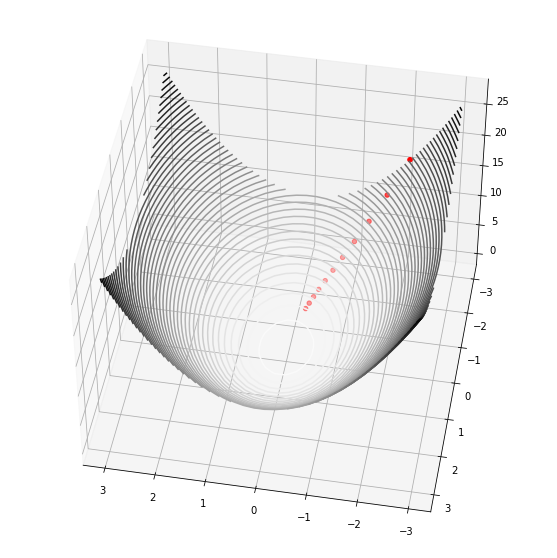

<Figure size 432x288 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from mpl_toolkits import mplot3d #用于绘制3D图形


#梯度函数的导数
def gradJ1(theta):
    return 4*theta
def gradJ2(theta):
    return 2*theta
 
#梯度函数
def f(x, y):
    return  2*x**2 +y**2

def ff(x,y):
    return 2*np.power(x,2)+np.power(y,2)

def train(lr,epoch,theta1,theta2,up,dirc):
    t1 = [theta1]
    t2 = [theta2]
    for i in range(epoch):
        gradient = gradJ1(theta1)
        theta1 = theta1 - lr*gradient
        t1.append(theta1)
        gradient = gradJ2(theta2)
        theta2 = theta2 - lr*gradient
        t2.append(theta2)
        
    plt.figure(figsize=(10,10))     #设置画布大小
    x = np.linspace(-3,3,30)
    y = np.linspace(-3,3,30)
    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)    
    ax = plt.axes(projection='3d')
    fig =plt.figure()
    #ax1 = plt.subplot(2, 1, 1)
    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none') #曲面图
    #ax.plot_wireframe(X, Y, Z, color='c') #线框图
    ax.contour3D(X, Y, Z, 50, cmap='binary')#等高线图
    #fig =plt.figure()
    #print(t1)
    #print(ff(t1,t2)+10)
    #ax1 = plt.subplot(2, 2, 1)
    ax.scatter3D(t1, t2, ff(t1,t2), c='r',marker = 'o')
    #ax.plot3D(t1, t2,  ff(t1,t2),'red')
    #调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
    ax.view_init(up, dirc)

#可以随时调节，查看效果 (最小值，最大值，步长)
@interact(lr=(0, 2, 0.0002),epoch=(1,100,1),init_theta1=(-3,3,0.1),init_theta2=(-3,3,0.1),up=(-180,180,1),dirc=(-180,180,1),continuous_update=False)
#lr为学习率（步长） epoch为迭代次数   init_theta为初始参数的设置 up调整图片上下视角 dirc调整左右视角
def visualize_gradient_descent(lr=0.05,epoch=10,init_theta1=-2,init_theta2=-3,up=45,dirc=100):
    train(lr,epoch,init_theta1,init_theta2,up,dirc)
